In [1]:
#importing necessary libraries. 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
import random

In [2]:
#reading in the data.
data = pd.read_csv("dataexercise2.csv")

In [3]:
#creating the design matrix.
x=data.drop(columns=["y"])

In [4]:
#creating the target column vector and also the log of the factorial of the target vector. 
y = data["y"]
logyf= [np.log(math.factorial(i)) for i in y]

In [5]:
#function to compute the new sigma from the inv-gamma distribution. 
def sample_sigma(theta, alpha, beta):
    alpha_new = (alpha + 2)
    beta_new = (beta + (np.dot(theta.T,theta))/2)
    return (1/np.random.gamma(alpha_new, (1/beta_new)))

In [6]:
#Gibbs Sampling using the MH algorithm for theta. 
alpha = beta= 0.1 #initialising alpha and beta for the inv-gamma distribution.
acc_count=0 #variable to compute the acceptance rate.
theta_samples = [] #list to store all the theta samples.
sig_sq_samples =[] #list to store all the sigma square samples
theta = np.random.randn(4,1) #initialising theta with a random value.
sigma_prop = 0.067 # standard deviation of gaussian proposal
n_samps = 2400 # number of samples to take
sig_sq = (1/np.random.gamma(alpha, (1/beta))) # initial variance for the prior theta. Using 1/beta as python uses the scale parameter. 
for samp in range(n_samps):
    # generate theta_new as per the random walk proposal. 
    theta_new = theta + np.random.randn(4,1)*sigma_prop
    # computing the posterior ratio of theta_new and theta. Here the new sig_sq sample is used in each iteration.
    r = -(1.0/(2.0*sig_sq))*np.dot(theta_new.T,theta_new).flatten()
    r -= -(1.0/(2.0*sig_sq))*np.dot(theta.T,theta).flatten() 
    P_new = np.exp(np.dot(x,theta_new))
    P = np.exp(np.dot(x,theta))
    r += np.sum(np.multiply(y,np.dot(x,theta_new).flatten()) - P_new.flatten()-logyf)
    r -= np.sum(np.multiply(y,np.dot(x,theta).flatten()) - P.flatten()-logyf)
    #since the ratio is in log form, i remove the log to perform the acceptance criteria.
    if np.exp(r)>=1:
        # accept if ratio is greater than or equal to 1.
        theta = theta_new
        acc_count+=1
    else:
        if random.uniform(0,1) <= np.exp(r):
            # if ratio is less than 1, accept if the ratio is higher than random number generated uniformly between 0 and 1.
            theta = theta_new
            acc_count+=1
        else:
            # otherwise reject
            pass
        
    theta_samples.append(theta.flatten())#appending the newly generated sample to the list.
    sig_sq=sample_sigma(theta.flatten(),alpha,beta)#sampling the sig_sq using the latest sample for theta.
    sig_sq_samples.append(sig_sq)#appending the newly generated sample to the list.
print("Acceptance Rate: " + str((acc_count/n_samps)*100))# printing acceptance rate.

Acceptance Rate: 36.45833333333333


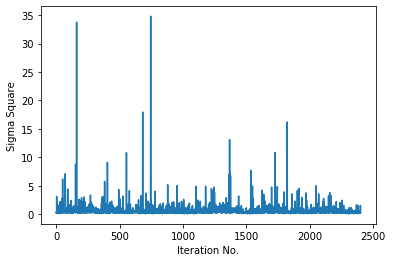

In [7]:
#creating the trace plot. 
plt.plot(sig_sq_samples)
plt.xlabel("Iteration No.")
plt.ylabel("Sigma Square")
plt.show()